In [ ]:
Author-Aishwarya Hake

# Importing Libraries


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
%matplotlib inline
warnings.filterwarnings('ignore')

In [57]:
#Load the dataset
df = pd.read_csv('Wine_data.csv')

In [32]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [33]:
df.shape

(1599, 12)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


# Description


In [35]:
#statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


# Finding Null Values


In [58]:
# check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [60]:
df=df.dropna()

In [61]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

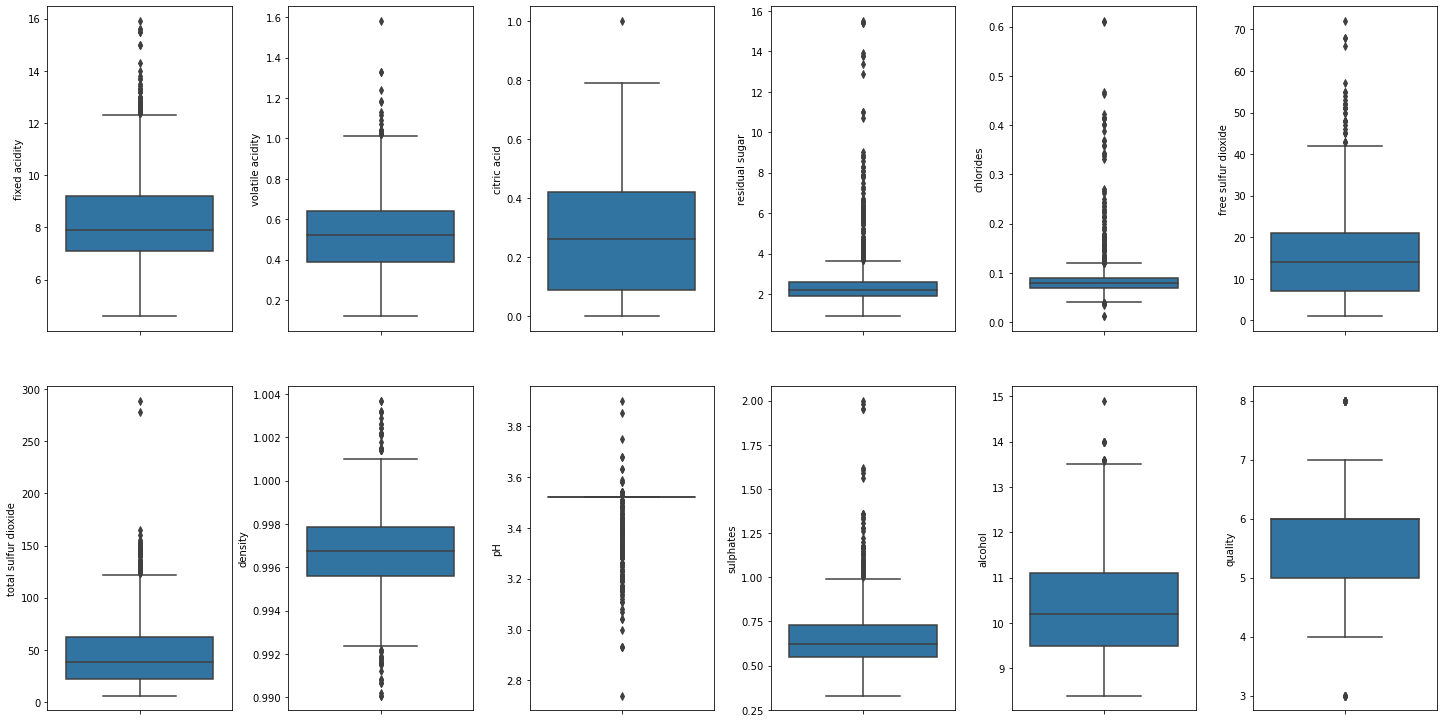

In [40]:
#create box plots
fig,ax = plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index = 0
ax=ax.flatten()

for col, value in df.items():
    if col !='type':
        sns.boxplot(y=col, data=df,ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

Observations regarding variables: All variables have outliers

.Quality has most values concentrated in the categories 5, 6 and 7. Only a small proportion is in the categories [3, 4] and [8, 9] and none in the categories [1, 2] and 10.

.Fixed acidity, volatile acidity and citric acid have outliers. If those outliers are eliminated distribution of the variables may be taken to be symmetric.

.Residual sugar has a positively skewed distribution; even after eliminating the outliers distribution will remain skewed.

.Some of the variables, e.g . free sulphur dioxide, density, have a few outliers but these are very different from the rest.

.Mostly outliers are on the larger side.

.Alcohol has an irregular shaped distribution but it does not have pronounced outliers.

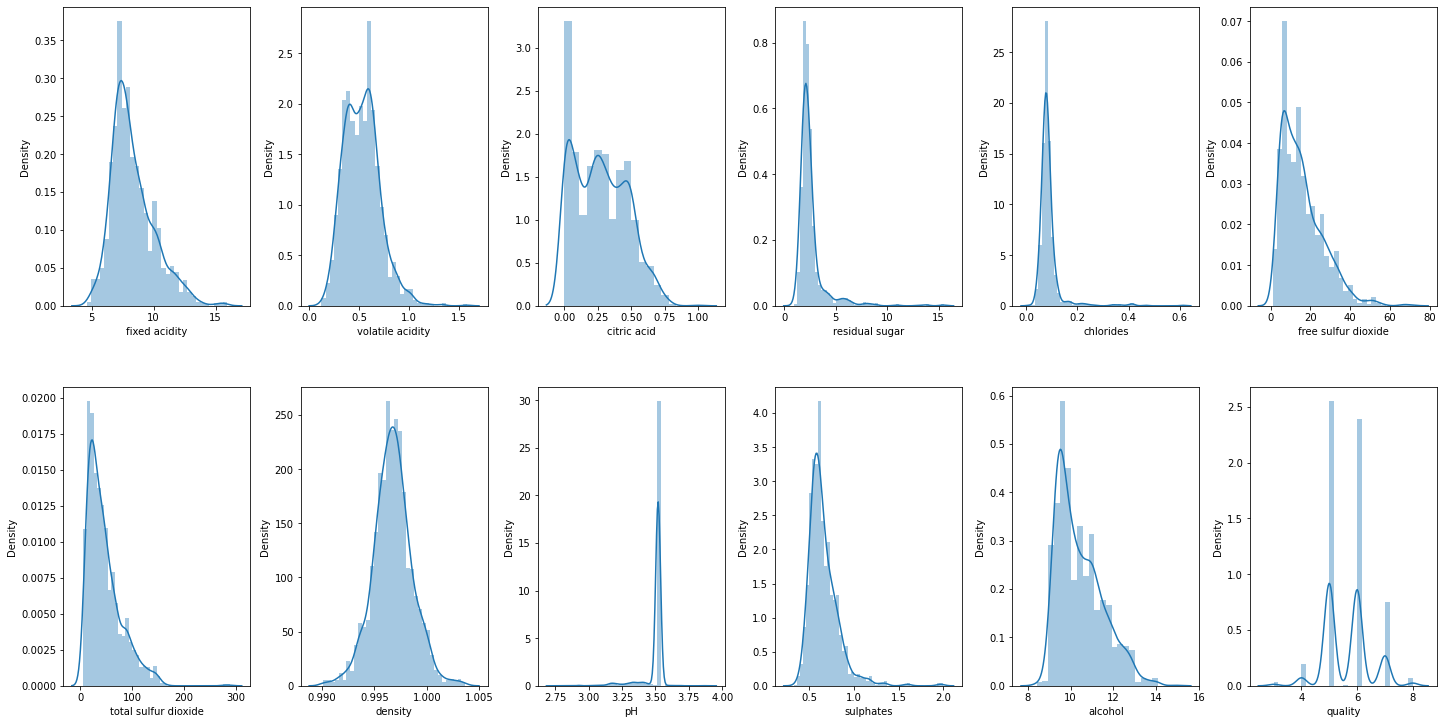

In [41]:
#dist plot for Visualize the distribution of each variable:


import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Data Visualization


No handles with labels found to put in legend.


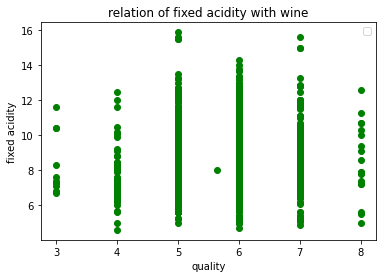

In [42]:
#Bivariate Analysis

# checking the variation of fixed acidity in the different qualities of wine

plt.scatter(df['quality'], df['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

No handles with labels found to put in legend.


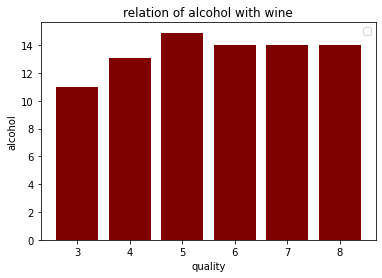

In [47]:

# checking the variation of fixed acidity in the different qualities of wine

plt.bar(df['quality'], df['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

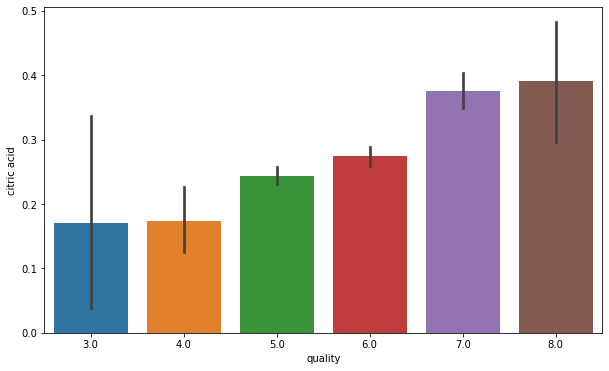

In [62]:
# Composition of citric acid go higher as we go higher in the quality of the wine

import seaborn as sns

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

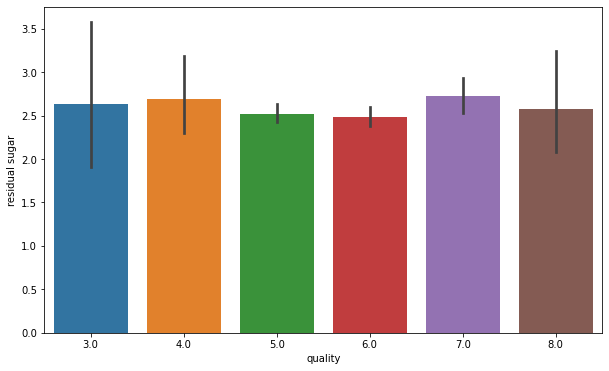

In [63]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

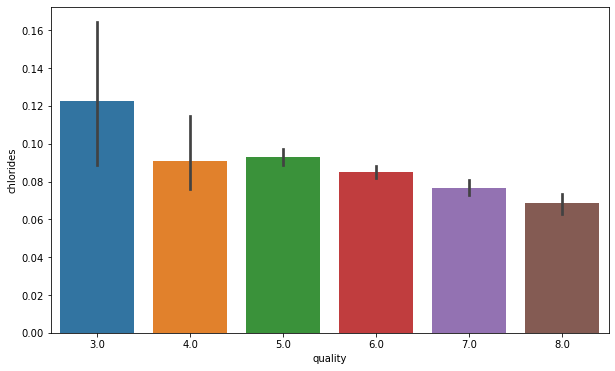

In [64]:
#Composition of chloride also go down as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

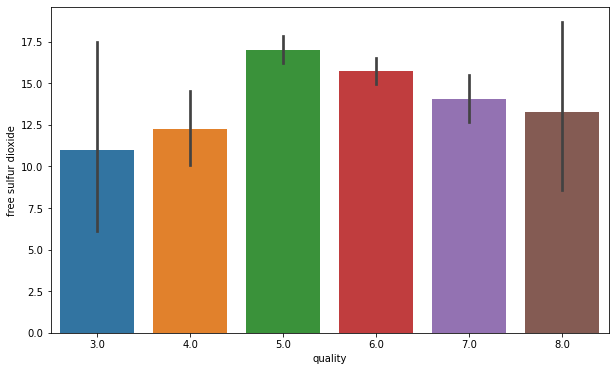

In [65]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

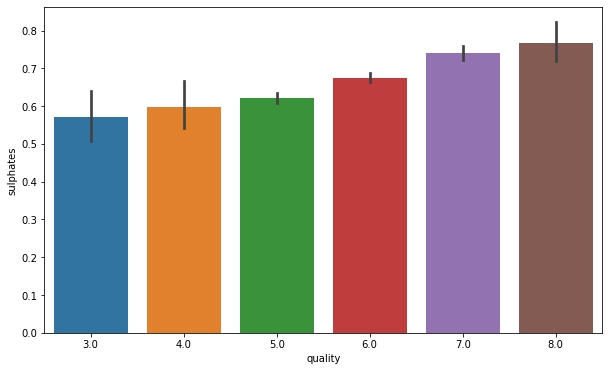

In [66]:
#Sulphates level goes higher with the quality of wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

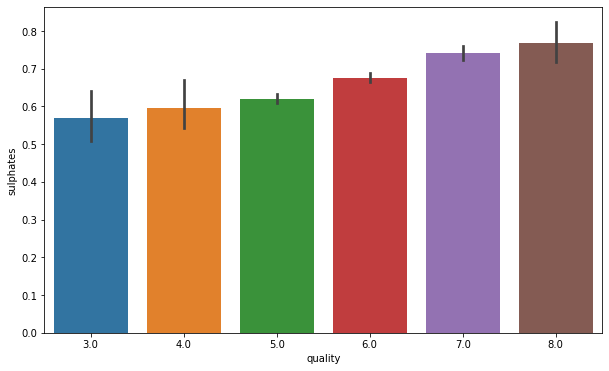

In [67]:

#Sulphates level goes higher with the quality of wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

As we can see that like the above two items do not have very strong relation to the dependent variable we have to showcase a correlation plot to check which of the items are more related to the dependent variable and which items are less related to the dependent variables.

# Coorelation Matrix


<AxesSubplot:>

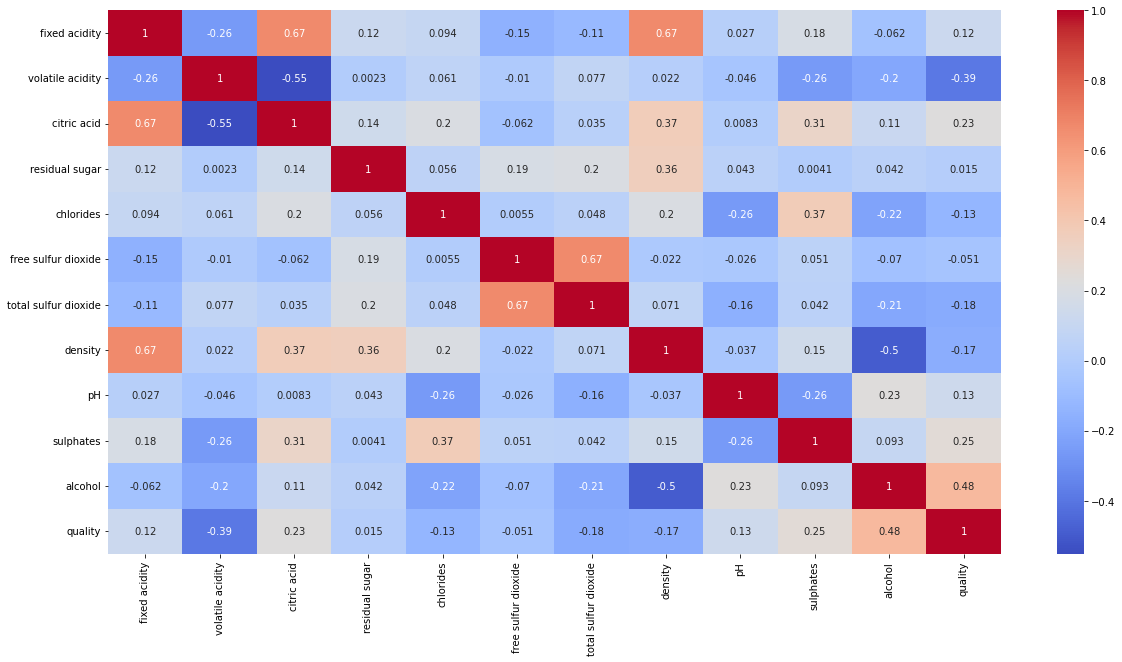

In [68]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

From the above correlation plot for the given dataset for wine quality prediction, we can easily see which items are related strongly with each other and which items are related weakly with each other. For Example,

The strongly correlated items are : 1.fixed acidity and citric acid. 2.free sulphur dioxide and total sulphor dioxide. 3.fixed acidity and density. 4. alcohol and quality.

so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.

The weakly correlated items are : 1.citric acid and volatile acidity. 2.fixed acidity and ph. 3.density and alcohol.

These are some relations which do not depend on each other at all.

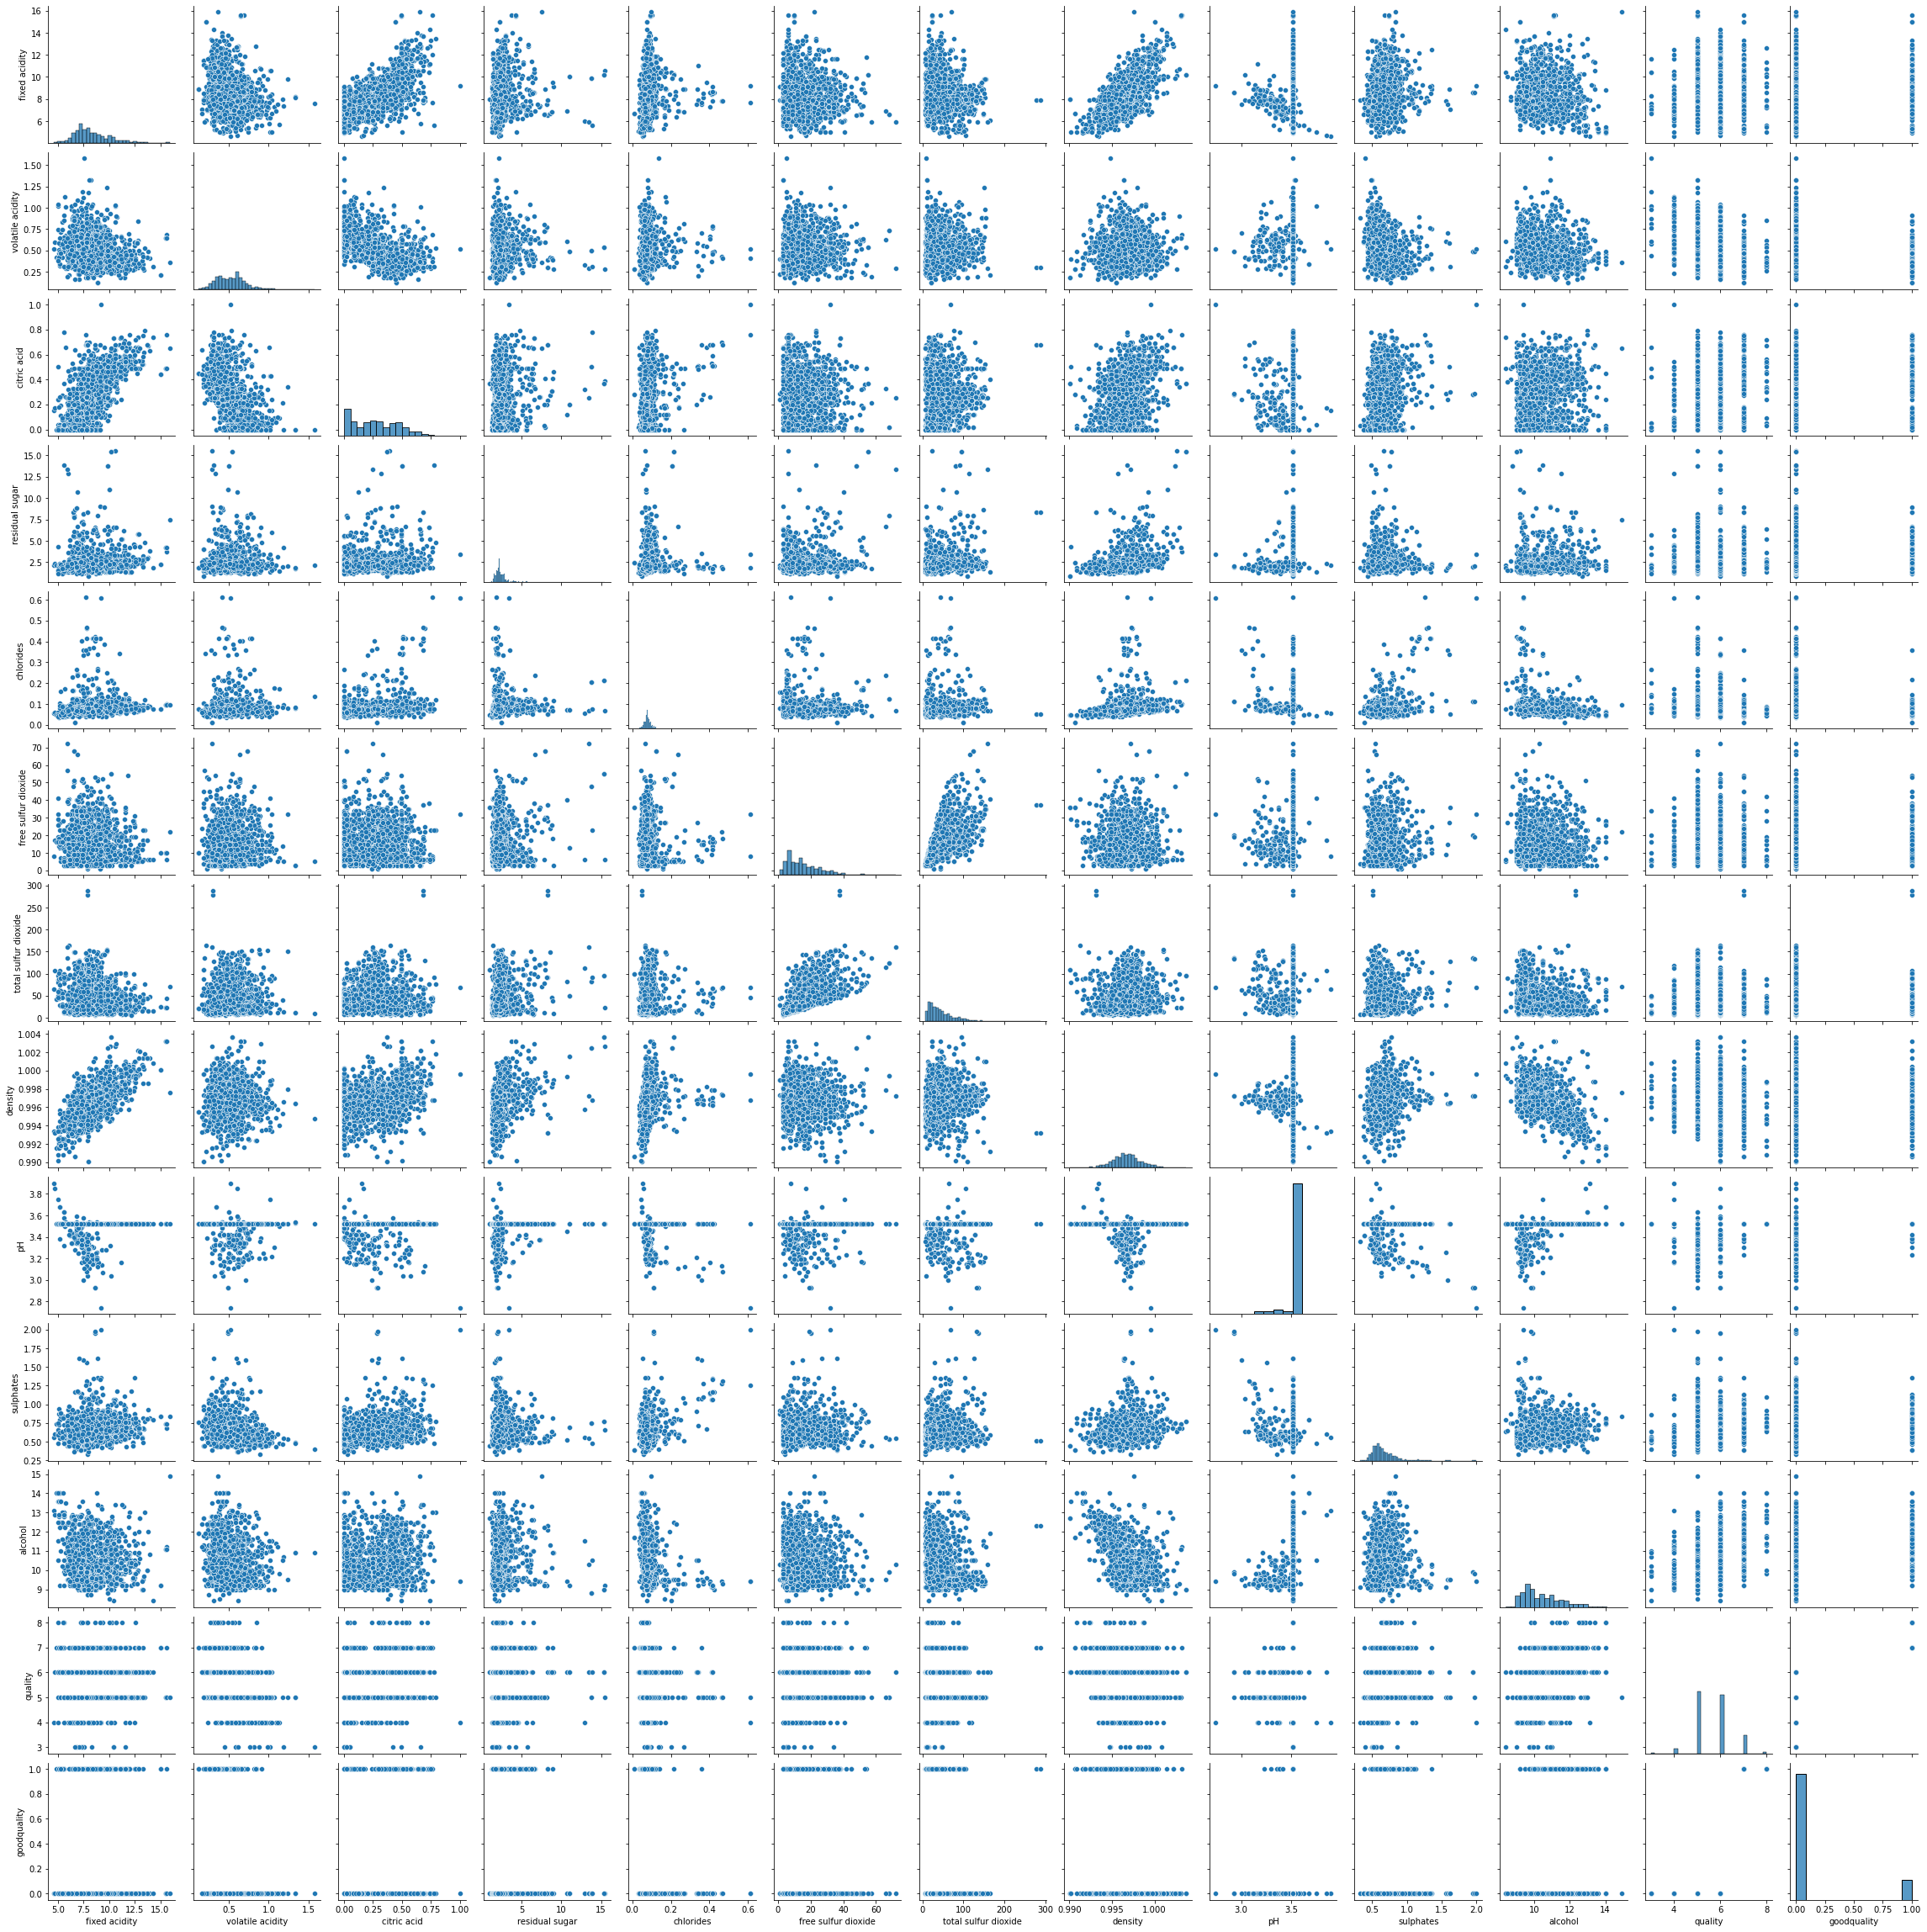

In [93]:
sns.pairplot(df)


# Data pre-processing

# Feature Selection


In [96]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

In [97]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

0    1379
1     217
Name: goodquality, dtype: int64

<AxesSubplot:xlabel='goodquality', ylabel='count'>

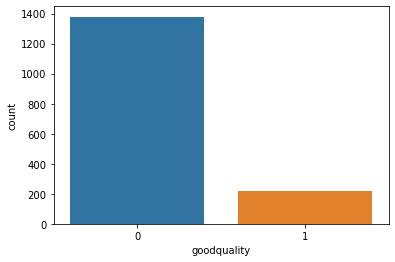

In [99]:
sns.countplot(df['goodquality'])


In [71]:
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2


In [72]:
print(Y)


0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1596, dtype: int64


# Feature Importance


In [89]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.08216845 0.10917622 0.10045238 0.07959235 0.07440949 0.07282703
 0.08475158 0.09759452 0.01246999 0.11825189 0.1683061 ]


# Splitting Dataset


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

# LogisticRegression


In [102]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score



# creating the model
model = LogisticRegression()

# feeding the training set into the model
model.fit(X_train, Y_train)

# predicting the results for the test set
Y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, Y_train))
print("Testing accuracy :", model.score(X_test, Y_test))

# classification report
print(classification_report(Y_test, Y_pred))

# confusion matrix
print(confusion_matrix(Y_test, Y_pred))

Training accuracy : 0.8836168307967771
Testing accuracy : 0.8559498956158664
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       402
           1       0.62      0.27      0.38        77

    accuracy                           0.86       479
   macro avg       0.75      0.62      0.65       479
weighted avg       0.83      0.86      0.83       479

[[389  13]
 [ 56  21]]


# Using KNN


In [103]:
from sklearn.neighbors import KNeighborsClassifier
# creating the model
model = KNeighborsClassifier()

# feeding the training set into the model
model.fit(X_train, Y_train)

# predicting the results for the test set
Y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, Y_train))
print("Testing accuracy :", model.score(X_test, Y_test))

# classification report
print(classification_report(Y_test, Y_pred))

# confusion matrix
print(confusion_matrix(Y_test, Y_pred))

Training accuracy : 0.8979409131602507
Testing accuracy : 0.8350730688935282
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       402
           1       0.46      0.16      0.23        77

    accuracy                           0.84       479
   macro avg       0.66      0.56      0.57       479
weighted avg       0.79      0.84      0.80       479

[[388  14]
 [ 65  12]]


# Using SVC


In [104]:
from sklearn.svm import SVC
model = SVC()
# feeding the training set into the model
model.fit(X_train, Y_train)

# predicting the results for the test set
Y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, Y_train))
print("Testing accuracy :", model.score(X_test, Y_test))

# classification report
print(classification_report(Y_test, Y_pred))

# confusion matrix
print(confusion_matrix(Y_test, Y_pred))

Training accuracy : 0.8764547896150403
Testing accuracy : 0.8392484342379958
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       402
           1       0.00      0.00      0.00        77

    accuracy                           0.84       479
   macro avg       0.42      0.50      0.46       479
weighted avg       0.70      0.84      0.77       479

[[402   0]
 [ 77   0]]


# Using Decision Tree


In [106]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# feeding the training set into the model
model.fit(X_train, Y_train)

# predicting the results for the test set
Y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, Y_train))
print("Testing accuracy :", model.score(X_test, Y_test))

# classification report
print(classification_report(Y_test, Y_pred))

# confusion matrix
print(confusion_matrix(Y_test, Y_pred))

Training accuracy : 1.0
Testing accuracy : 0.8580375782881002
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       402
           1       0.56      0.52      0.54        77

    accuracy                           0.86       479
   macro avg       0.74      0.72      0.73       479
weighted avg       0.85      0.86      0.86       479

[[371  31]
 [ 37  40]]


# Using GaussianNB


In [111]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
# feeding the training set into the model
model.fit(X_train, Y_train)

# predicting the results for the test set
Y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, Y_train))
print("Testing accuracy :", model.score(X_test, Y_test))

# classification report
print(classification_report(Y_test, Y_pred))

# confusion matrix
print(confusion_matrix(Y_test, Y_pred))

Training accuracy : 0.7958818263205013
Testing accuracy : 0.7933194154488518
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       402
           1       0.42      0.77      0.54        77

    accuracy                           0.79       479
   macro avg       0.68      0.78      0.71       479
weighted avg       0.86      0.79      0.81       479

[[321  81]
 [ 18  59]]


# Using Random Forest



In [112]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(random_state=1)
# feeding the training set into the model
model.fit(X_train, Y_train)

# predicting the results for the test set
Y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, Y_train))
print("Testing accuracy :", model.score(X_test, Y_test))

# classification report
print(classification_report(Y_test, Y_pred))

# confusion matrix
print(confusion_matrix(Y_test, Y_pred))

Training accuracy : 1.0
Testing accuracy : 0.8935281837160751
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       402
           1       0.86      0.40      0.55        77

    accuracy                           0.89       479
   macro avg       0.88      0.70      0.74       479
weighted avg       0.89      0.89      0.88       479

[[397   5]
 [ 46  31]]


# RESULT COMPARING

In [113]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest'],
    'Score': [0.855,0.830,0.839,0.870,0.793,0.893]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.893,Random Forest
0.870,Decision Tree
0.855,Logistic Regression
0.839,SVC
0.830,KNN
0.793,GaussianNB


In [29]:
#Hence I will use Random Forest algorithms for training my model.